# Salary Prediction for Position Level using SVR

**Scenario**: You are looking to hire a potential candidate of Level 7 who is seeking \\$190,000 in compensation. 

**Goal**: Is this compensation level aligned with your current research?

**Results Summary**: 

The predicted compensation for a Level 7 position is \\$209,410. This is in line with the candidate's expected compensation of \\$190,000. 

Ten unique salaries from position levels 1-10 were trained using Support Vector Regression. Because this was a limited dataset, training was performed on the whole dataset, rather than splitting it into a training set and test set. 

Whereas, polynomial regression included position level 10 `CEO` to formulate its equation, support vector regression treated this level as an outlier.

## Table of Contents

- Importing the libraries
- Importing the dataset
- Feature Scaling
- Training the SVR model on the whole dataset
- Predicting a new result
- Visualizing the SVR results
- Visualizing the SVR results (for higher resolution and smoother curve)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

### X and y before transformation

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Transforming y

y is reshaped to the same array form as X

In [5]:
y = y.reshape(len(y), 1)

## Feature Scaling

Feature scaling needs to also be applied to the dependent variable `Salary` because the values are much higher than the independent variable `Level`.

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

### X and y after transformation

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

The SVM kernel function we will use is Gaussian Radial Basis Function (RBF).
SVR is SVM for regression.

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X, y)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

Inverse transformation must be applied to return the original y value instead of the transformed y value

In [10]:
X_level = 7
y_level = sc_y.inverse_transform(regressor.predict(sc_X.transform([[X_level]])).reshape(-1, 1))
print(f"The expected compensation for a Level 7 position is ${int(y_level):,}")

The expected compensation for a Level 7 position is $209,410


## Visualizing the SVR results

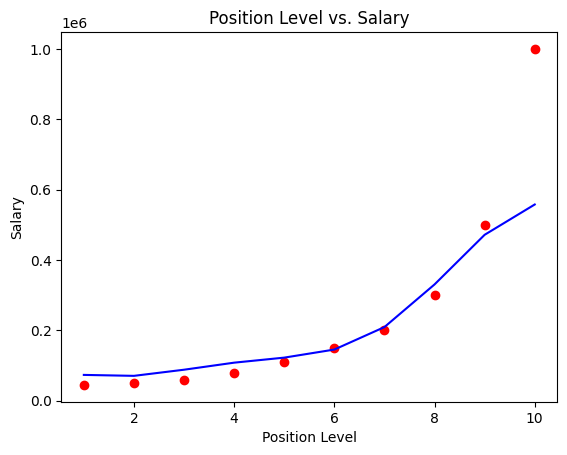

In [11]:
y_new = sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = "blue")
plt.title("Position Level vs. Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

The salary for the last position `CEO` is considered an outlier.

## Visualizing the SVR results (for higher resolution and smoother curve)

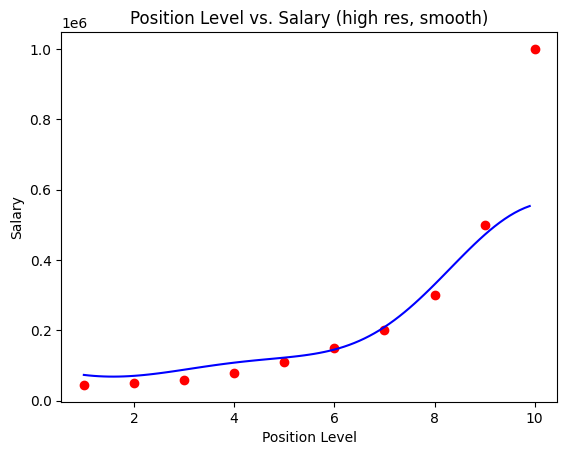

In [12]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = "blue")
plt.title("Position Level vs. Salary (high res, smooth)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()